Import libraries

In [37]:
import cv2
import os
import tensorflow as tf 
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize , to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Activation , Dropout , Flatten , Dense
from keras.optimizers import Adam

Read data from directory and make a dataset 

In [38]:
image_directory = "datasets/"
no_tumor_images = os.listdir(image_directory+"no/")
yes_tumor_images  = os.listdir(image_directory+"yes/")

In [39]:
dataset=[]
label=[]

In [40]:
INPUT_SIZE = 64

In [41]:
for i , image_name in enumerate(no_tumor_images):
    if (image_name.split(".")[1]=="jpg"):
        image = cv2.imread(image_directory+"no/"+image_name)
        image = Image.fromarray(image,"RGB")
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [42]:
for i , image_name in enumerate(yes_tumor_images):
    if (image_name.split(".")[1]=="jpg"):
        image = cv2.imread(image_directory+"yes/"+image_name)
        image = Image.fromarray(image,"RGB")
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [43]:
dataset=np.array(dataset)
label = np.array(label)

Split data to train and test and normalize it  

In [44]:
x_train ,x_test ,y_train ,y_test = train_test_split(dataset,label,test_size=0.2,random_state=0)

In [45]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [46]:
y_train = to_categorical(y_train,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

Building and training the model

In [47]:
model = Sequential()

model.add(Conv2D(32 , (3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32 , (3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32 , (3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu')) 
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

In [48]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"])

In [49]:
history = model.fit(
            x_train,
            y_train,
            batch_size=16,
            verbose=1,
            epochs=12,
            validation_data=(x_test,y_test),
            shuffle=False)

Epoch 1/12
150/150 [==============================] - 19s 119ms/step - loss: 0.5420 - accuracy: 0.7279 - val_loss: 0.4347 - val_accuracy: 0.8117
Epoch 2/12
150/150 [==============================] - 22s 147ms/step - loss: 0.4059 - accuracy: 0.8363 - val_loss: 0.3419 - val_accuracy: 0.8433
Epoch 3/12
150/150 [==============================] - 19s 128ms/step - loss: 0.3139 - accuracy: 0.8712 - val_loss: 0.2562 - val_accuracy: 0.8967
Epoch 4/12
150/150 [==============================] - 15s 99ms/step - loss: 0.2187 - accuracy: 0.9192 - val_loss: 0.1803 - val_accuracy: 0.9517
Epoch 5/12
150/150 [==============================] - 15s 98ms/step - loss: 0.1399 - accuracy: 0.9533 - val_loss: 0.1486 - val_accuracy: 0.9567
Epoch 6/12
150/150 [==============================] - 15s 99ms/step - loss: 0.0979 - accuracy: 0.9679 - val_loss: 0.1220 - val_accuracy: 0.9667
Epoch 7/12
150/150 [==============================] - 15s 99ms/step - loss: 0.0828 - accuracy: 0.9725 - val_loss: 0.0992 - val_accura

In [50]:
model.save("brainTumore.h4")

INFO:tensorflow:Assets written to: brainTumore.h4\assets


INFO:tensorflow:Assets written to: brainTumore.h4\assets


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [52]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()  
    except:
      pass

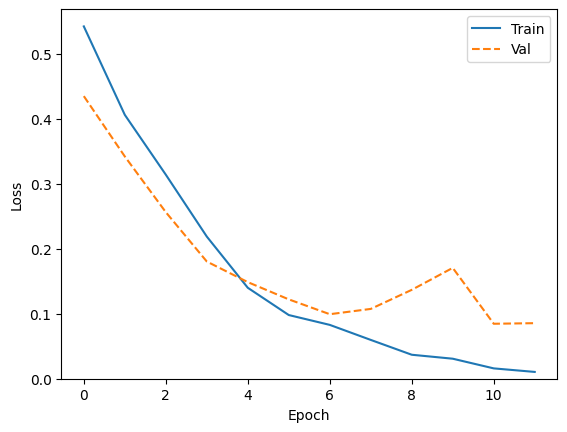

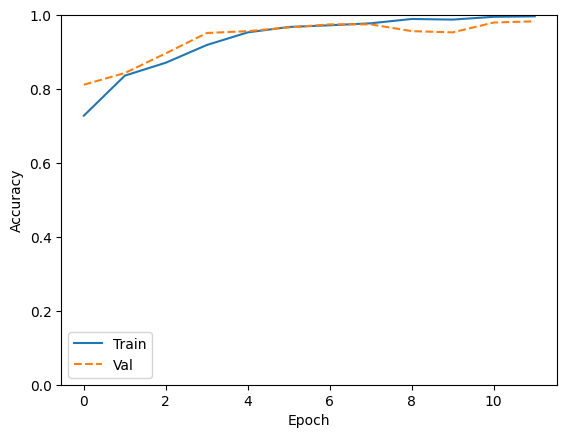

In [53]:
plot_metrics(history)